In [1]:
pip install imutils

In [2]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import keras
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from PIL import Image
import matplotlib.image as mpimg

In [3]:
! kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip -d face_mask

Streaming output truncated to the last 5000 lines.
  inflating: face_mask/data/with_mask/with_mask_3297.jpg  
  inflating: face_mask/data/with_mask/with_mask_3298.jpg  
  inflating: face_mask/data/with_mask/with_mask_3299.jpg  
  inflating: face_mask/data/with_mask/with_mask_33.jpg  
  inflating: face_mask/data/with_mask/with_mask_330.jpg  
  inflating: face_mask/data/with_mask/with_mask_3300.jpg  
  inflating: face_mask/data/with_mask/with_mask_3301.jpg  
  inflating: face_mask/data/with_mask/with_mask_3302.jpg  
  inflating: face_mask/data/with_mask/with_mask_3303.jpg  
  inflating: face_mask/data/with_mask/with_mask_3304.jpg  
  inflating: face_mask/data/with_mask/with_mask_3305.jpg  
  inflating: face_mask/data/with_mask/with_mask_3306.jpg  
  inflating: face_mask/data/with_mask/with_mask_3307.jpg  
  inflating: face_mask/data/with_mask/with_mask_3308.jpg  
  inflating: face_mask/data/with_mask/with_mask_3309.jpg  
  inflating: face_mask/data/with_mask/with_mask_331.jpg  
  inflati

In [4]:
filenames_with_mask = os.listdir('/content/face_mask/data/with_mask')
print(filenames_with_mask)

['with_mask_22.jpg', 'with_mask_1845.jpg', 'with_mask_2802.jpg', 'with_mask_3701.jpg', 'with_mask_3608.jpg', 'with_mask_1279.jpg', 'with_mask_823.jpg', 'with_mask_173.jpg', 'with_mask_681.jpg', 'with_mask_1333.jpg', 'with_mask_824.jpg', 'with_mask_518.jpg', 'with_mask_488.jpg', 'with_mask_408.jpg', 'with_mask_2873.jpg', 'with_mask_2612.jpg', 'with_mask_1104.jpg', 'with_mask_2140.jpg', 'with_mask_729.jpg', 'with_mask_1936.jpg', 'with_mask_2737.jpg', 'with_mask_1503.jpg', 'with_mask_2200.jpg', 'with_mask_1776.jpg', 'with_mask_1721.jpg', 'with_mask_956.jpg', 'with_mask_203.jpg', 'with_mask_146.jpg', 'with_mask_2808.jpg', 'with_mask_2730.jpg', 'with_mask_3440.jpg', 'with_mask_3143.jpg', 'with_mask_1566.jpg', 'with_mask_425.jpg', 'with_mask_3231.jpg', 'with_mask_1978.jpg', 'with_mask_387.jpg', 'with_mask_661.jpg', 'with_mask_3662.jpg', 'with_mask_1824.jpg', 'with_mask_2196.jpg', 'with_mask_325.jpg', 'with_mask_1198.jpg', 'with_mask_1614.jpg', 'with_mask_1807.jpg', 'with_mask_2454.jpg', 'wit

In [5]:
filenames_without_mask = os.listdir('/content/face_mask/data/without_mask')
print(filenames_without_mask)

['without_mask_1217.jpg', 'without_mask_1256.jpg', 'without_mask_3526.jpg', 'without_mask_3365.jpg', 'without_mask_2720.jpg', 'without_mask_3740.jpg', 'without_mask_3099.jpg', 'without_mask_1875.jpg', 'without_mask_730.jpg', 'without_mask_3539.jpg', 'without_mask_2875.jpg', 'without_mask_3066.jpg', 'without_mask_1137.jpg', 'without_mask_3378.jpg', 'without_mask_2646.jpg', 'without_mask_1541.jpg', 'without_mask_1347.jpg', 'without_mask_3166.jpg', 'without_mask_2921.jpg', 'without_mask_1261.jpg', 'without_mask_1908.jpg', 'without_mask_2381.jpg', 'without_mask_3061.jpg', 'without_mask_411.jpg', 'without_mask_1145.jpg', 'without_mask_739.jpg', 'without_mask_966.jpg', 'without_mask_519.jpg', 'without_mask_2598.jpg', 'without_mask_1619.jpg', 'without_mask_2922.jpg', 'without_mask_1043.jpg', 'without_mask_1866.jpg', 'without_mask_3168.jpg', 'without_mask_2232.jpg', 'without_mask_105.jpg', 'without_mask_3265.jpg', 'without_mask_1025.jpg', 'without_mask_3597.jpg', 'without_mask_3055.jpg', 'with

In [6]:
num_with = len(filenames_with_mask)
num_without = len(filenames_without_mask)

In [7]:
print("Number of image with mask:", num_with)
print("Number of images without mask:", num_without)

Number of image with mask: 3725
Number of images without mask: 3828


Creating labesls for two class of images


In [8]:
with_mask_labels = [1] * num_with
without_mask_labels = [0] * num_without
print(with_mask_labels)
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
labels = with_mask_labels + without_mask_labels
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

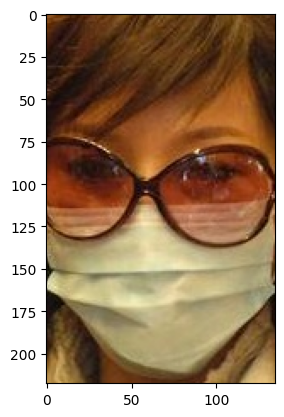

In [10]:
# Displaying the with mask image
img = mpimg.imread('/content/face_mask/data/with_mask/with_mask_10.jpg')
imgplot = plt.imshow(img)

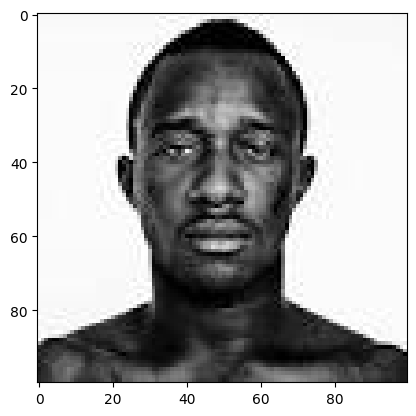

In [11]:
# Displaying the with mask image
img = mpimg.imread('/content/face_mask/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)

Since the widths and dimentions are not same so we are resizing the image

In [12]:
# creating the directory for resized image
os.mkdir("with_mask_resized_images")
os.mkdir("without_mask_resized_images")

In [13]:
# resize with_mask images

with_mask_folder = '/content/face_mask/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized_images/'

for filename in os.listdir(with_mask_folder):
    img_path = with_mask_folder + filename
    img = Image.open(img_path)
    img = img.resize((128,128))
    img = img.convert('RGB')

    newImgPath = with_mask_resized_folder + filename
    img.save(newImgPath)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
without_mask_folder = '/content/face_mask/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized_images/'

In [15]:
for filename in os.listdir(without_mask_folder):
    img_path = os.path.join(without_mask_folder, filename)  # Correctly join the path
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert('RGB')

    newImgPath = os.path.join(without_mask_resized_folder, filename)  # Correctly join the path
    img.save(newImgPath)

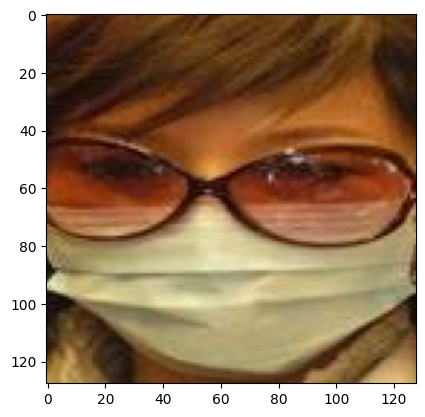

In [16]:
img = mpimg.imread('/content/with_mask_resized_images/with_mask_10.jpg')
imgplot = plt.imshow(img)

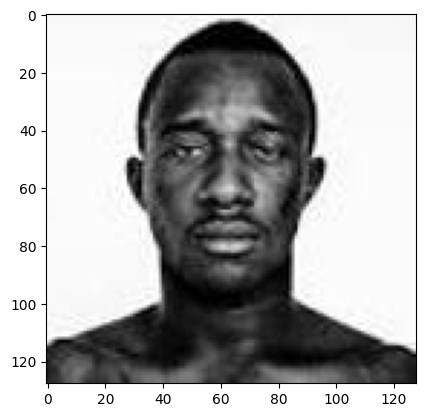

In [17]:
img = mpimg.imread('/content/without_mask_resized_images/without_mask_1.jpg')
imgplot = plt.imshow(img)

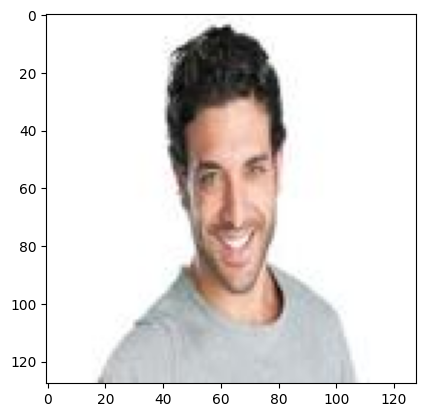

In [18]:
img = mpimg.imread('/content/without_mask_resized_images/without_mask_1000.jpg')
imgplot = plt.imshow(img)

Converting the images to numpy arrays

In [19]:
import cv2
import glob

In [20]:
# Reading with mask images
imdir = '/content/with_mask_resized_images/'
ext = ['jpg','png']

file = []
[file.extend(glob.glob(os.path.join(imdir, '*.' + e))) for e in ext]

with_mask_images = np.array([cv2.imread(f) for f in file])

In [21]:
# Reading without mask images
imdir = '/content/without_mask_resized_images/'
ext = ['jpg','png']

file = []
[file.extend(glob.glob(os.path.join(imdir, '*.' + e))) for e in ext]

without_mask_images = np.array([cv2.imread(f) for f in file])

In [22]:
print(with_mask_images[0])

[[[ 59  36  51]
  [ 59  36  51]
  [ 60  37  52]
  ...
  [ 47  25  37]
  [ 49  25  37]
  [ 50  26  36]]

 [[ 59  36  51]
  [ 59  36  51]
  [ 60  37  52]
  ...
  [ 52  29  43]
  [ 53  31  43]
  [ 56  35  44]]

 [[ 59  35  53]
  [ 59  35  53]
  [ 60  36  54]
  ...
  [ 57  37  50]
  [ 50  30  43]
  [ 49  29  41]]

 ...

 [[103  81 100]
  [ 75  53  72]
  [ 73  51  70]
  ...
  [ 77  55  73]
  [ 60  41  58]
  [ 90  71  88]]

 [[110  88 107]
  [ 77  55  74]
  [ 69  47  66]
  ...
  [ 74  52  70]
  [ 79  60  77]
  [ 90  71  88]]

 [[109  87 106]
  [ 74  52  71]
  [ 64  42  61]
  ...
  [ 72  50  68]
  [ 95  76  93]
  [ 90  71  88]]]


In [23]:
print(without_mask_images.shape)

(3828, 128, 128, 3)


In [24]:
combined_images = np.concatenate((with_mask_images, without_mask_images), axis=0)

In [25]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [26]:
X = combined_images
y = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X.shape,X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [28]:
#standardizing the data
X_train_std = X_train.astype('float32')/255.0
X_test_std = X_test.astype('float32')/255.0

In [29]:
print(X_train_std[0])

[[[0.10588235 0.14117648 0.1764706 ]
  [0.10588235 0.14117648 0.1764706 ]
  [0.10588235 0.14117648 0.1764706 ]
  ...
  [0.10588235 0.14509805 0.14509805]
  [0.11372549 0.15294118 0.15294118]
  [0.11764706 0.15686275 0.15686275]]

 [[0.09803922 0.13333334 0.16862746]
  [0.09803922 0.13333334 0.16862746]
  [0.09803922 0.13333334 0.16862746]
  ...
  [0.09803922 0.13725491 0.13725491]
  [0.10588235 0.14117648 0.15294118]
  [0.10980392 0.14901961 0.14901961]]

 [[0.09803922 0.13333334 0.16862746]
  [0.09803922 0.13333334 0.16862746]
  [0.09803922 0.13333334 0.16862746]
  ...
  [0.09803922 0.13333334 0.14509805]
  [0.10588235 0.14117648 0.15686275]
  [0.10980392 0.14509805 0.15686275]]

 ...

 [[0.3019608  0.41568628 0.56078434]
  [0.30980393 0.42352942 0.5686275 ]
  [0.32156864 0.43529412 0.5882353 ]
  ...
  [0.16470589 0.21176471 0.23529412]
  [0.1764706  0.22352941 0.24705882]
  [0.18039216 0.22745098 0.2509804 ]]

 [[0.3019608  0.41960785 0.5568628 ]
  [0.3137255  0.43137255 0.5686275 ]


Building the neural network

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid'),

])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
model.fit(X_train_std, y_train, epochs=29)

Epoch 1/29
189/189 [==============================] - 2s 8ms/step - loss: 0.2628 - accuracy: 0.8984
Epoch 2/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2781 - accuracy: 0.8866
Epoch 3/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2661 - accuracy: 0.8921
Epoch 4/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2530 - accuracy: 0.8947
Epoch 5/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2536 - accuracy: 0.9014
Epoch 6/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2552 - accuracy: 0.9033
Epoch 7/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2738 - accuracy: 0.8894
Epoch 8/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2407 - accuracy: 0.9037
Epoch 9/29
189/189 [==============================] - 1s 6ms/step - loss: 0.2191 - accuracy: 0.9119
Epoch 10/29
189/189 [==============================] - 1s 7ms/step - loss: 0.2513 - accuracy: 0.8976

In [34]:
score, accuracy = model.evaluate(X_test_std, y_test)
print('Test loss:', score)
print('Test accuracy:', accuracy)

48/48 [==============================] - 1s 9ms/step - loss: 0.3149 - accuracy: 0.8954
Test loss: 0.31491103768348694
Test accuracy: 0.8954334855079651


Building a predictive system

In [35]:
from google.colab.patches import cv2_imshow

In [37]:
model.save('mask_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128, 128))
input_image_resize = input_image_resize / 255

image_reshape = np.reshape(input_image_resize, [1, 128, 128, 3])
input_prediction = model.predict(image_reshape)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person is wearing mask')
else:
    print('The person is not wearing mask')
